In [1]:
from aemulusnu_hmf_lib import massfunction

In [2]:
import pickle 
cosmos_f = open('../data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()


curr_cosmology = massfunction.cosmology(cosmo_params['Box_n50_0_1400'])

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
z_sample = np.linspace(0, 2, 10000)

In [5]:
mask = np.where(curr_cosmology.z_bg < 2.0)

(0.0, 2.0)

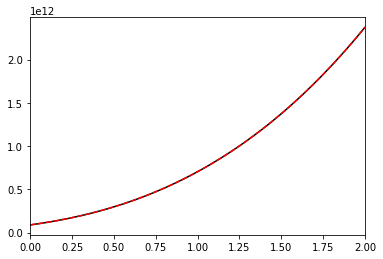

In [6]:
plt.plot(curr_cosmology.z_bg[mask], curr_cosmology.rho_cb[mask], 'k')
plt.plot(z_sample, curr_cosmology.f_rho_cb(z_sample), 'r--')
plt.xlim(0, 2)


[]

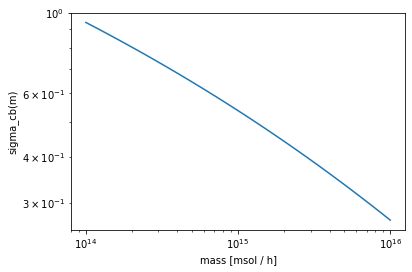

In [22]:
M = np.logspace(14, 16, 100)
sigmaM = [curr_cosmology.sigma_cb(M_curr, 0.0) for M_curr in M]
plt.plot(M, sigmaM)
plt.xlabel('mass [msol / h]')
plt.ylabel('sigma_cb(m)')
plt.loglog()

In [28]:
from scipy.interpolate import interp1d, UnivariateSpline

[]

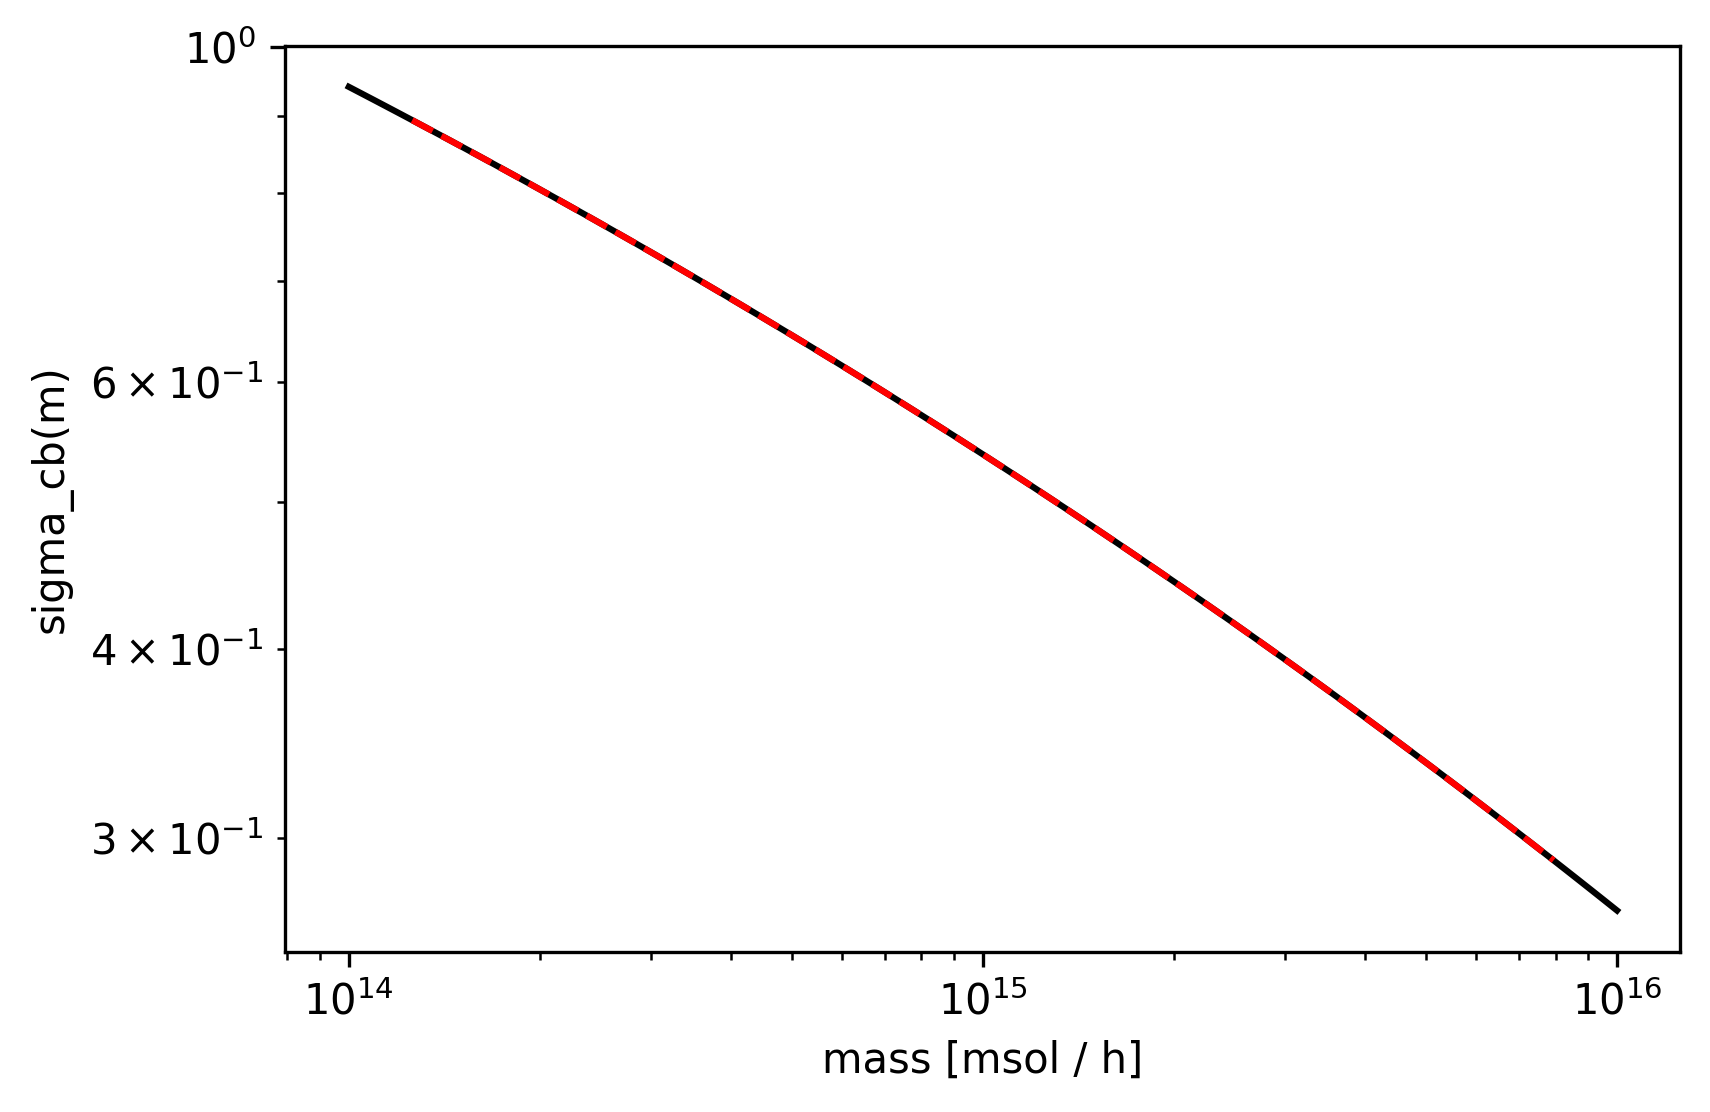

In [29]:
plt.figure(dpi=300)
f_sigmaM = UnivariateSpline(np.log(M), np.log(sigmaM))
plt.plot(M, sigmaM, 'k')

MSAMP = np.logspace(14.1, 15.9, 1123456)
plt.plot(MSAMP, np.exp(f_sigmaM(np.log(MSAMP))), 'r--')


plt.xlabel('mass [msol / h]')
plt.ylabel('sigma_cb(m)')
plt.loglog()

In [8]:
from scipy.interpolate import UnivariateSpline

Text(0, 0.5, 'ln sigma_cb(m)')

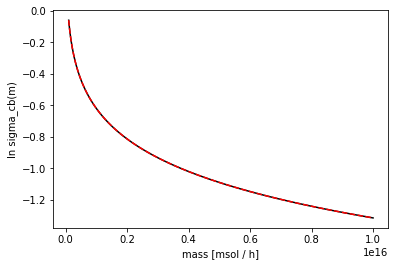

In [9]:
log_sigmaM = np.log(sigmaM)
f_log_sigmaM = UnivariateSpline(x = np.log(M), y = log_sigmaM)

plt.plot(M, log_sigmaM, 'k')
plt.plot(M, f_log_sigmaM(np.log(M)), 'r--')
plt.xlabel('mass [msol / h]')
plt.ylabel('ln sigma_cb(m)')

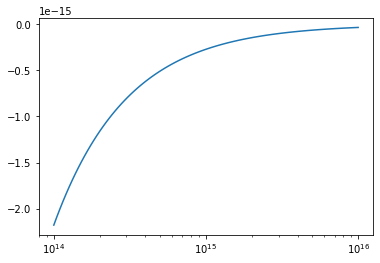

In [10]:
plt.plot(M, [curr_cosmology.dln_sigma_cb_dM(M_curr, 0.0) for M_curr in M])
plt.xscale('log')

In [11]:
x = np.logspace(0, 1, 10000)
f_lnx3 = UnivariateSpline(x = np.log(x), y = np.log(x**3))

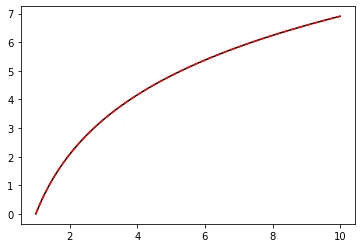

In [12]:
plt.plot(x, np.log(x**3), 'k')
plt.plot(x, f_lnx3(np.log(x)), 'r--')

In [13]:
f_dlnx3_dlnx = f_lnx3.derivative()

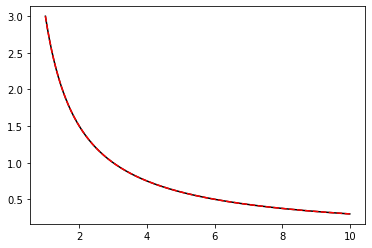

In [14]:
analytical_dln_x3 = 3/x
plt.plot(x, analytical_dln_x3, 'k')
plt.plot(x, 1/x*f_dlnx3_dlnx(np.log(x)), 'r--')

In [15]:
c_params = {'d': 1.96, 
            'e': 1.13,
           'f': 0.4,
           'g': 1.23}

In [16]:
from aemulusnu_hmf_lib.massfunction import mf
mf(curr_cosmology, 1e15, 0.0, c_params)

6.878900454905354e-22

In [17]:
curr_cosmology